In [139]:
import numpy as np

In [140]:
#Linear_Regression from scratch
class Linear_Regression():
    def __init__(self , learning_rate , no_of_iteartions):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iteartions

    def fit(self ,X ,Y):
        self.m ,self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0
        self.X=X
        self.Y=Y


        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):

        Y_prediction = self.predict(self.X)

        dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
        db = -(2* np.sum(self.Y - Y_prediction))/self.m 

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        


    def predict(self , X):

        return X.dot(self.w)  + self.b
    

    
        
    


In [141]:
#using the model
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


In [142]:
salary_data = pd.read_csv("salary_data.csv")
salary_data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [143]:
salary_data.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [144]:
salary_data.shape


(30, 2)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

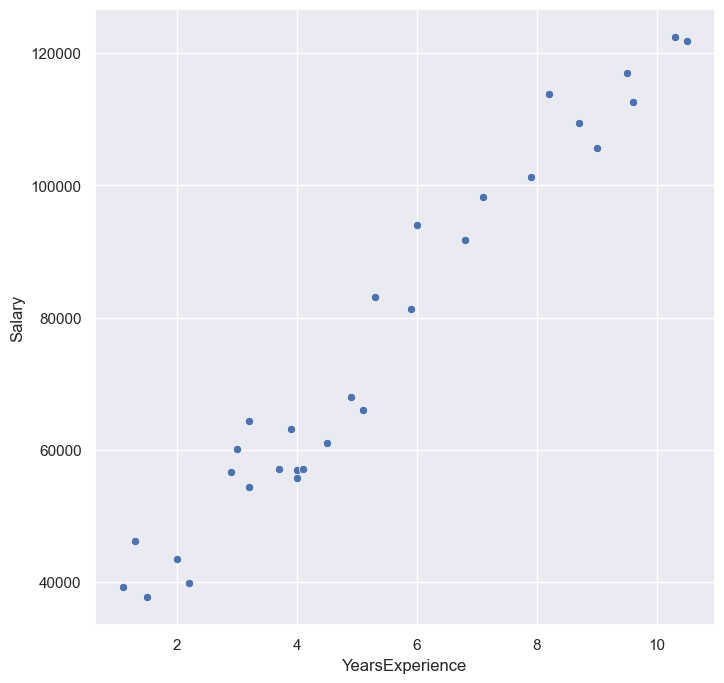

In [145]:
fig = plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=salary_data ,x="YearsExperience" , y ="Salary")

In [146]:
x = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values





In [147]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.33 , random_state=2)

In [148]:
#model  training
model = Linear_Regression(learning_rate=0.02 , no_of_iteartions=1000)
model.fit(x_train , y_train)



In [149]:
print("weight : " , model.w[0])
print("bias : " , model.b)

weight :  9514.400999035135
bias :  23697.406507136307


In [150]:
test_pred = model.predict(x_test)
print(train_pred)


[102865.31825883  53096.69618167  43525.80732068  89466.07385344
  52139.60729557 116264.56266422  62667.58504266  45439.98509288
  61710.49615656  73195.56278975 122964.18486691 110522.02934762
  75109.74056195  38740.36289018  55010.87395387 115307.47377812
 107650.76268932  80852.27387855  62667.58504266  99994.05160053
 124878.36263911  63624.67392876  71281.38501756  55010.87395387]


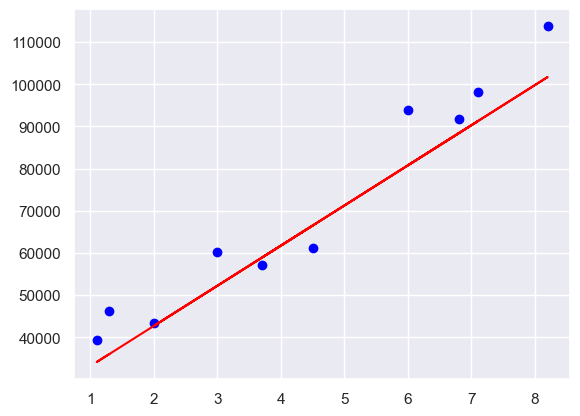

In [151]:
plt.scatter(x_test , y_test , color = "blue")
plt.plot(x_test , test_pred , color = "red")
